In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
df_kc_house = pd.read_csv("kc_house_data.csv")

In [12]:
df_kc_house.shape
# il y a 21613 maisons en ventes (lignes) et 23 caractéristiques (colonnes)

(21613, 21)

In [13]:
df_kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
valeurs_manquantes = df_kc_house.isnull().sum()
valeurs_manquantes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
valeurs_dupliquées = df_kc_house.duplicated().sum()
valeurs_dupliquées

0

In [16]:
########## CONVERTIR LE PRIX PAR RAPPORT AUX METRES CARRES ############
df_kc_house["sqft_living_price"] = df_kc_house["price"] / df_kc_house["sqft_living"]
df_kc_house["sqft_living_price"]

0        188.050847
1        209.338521
2        233.766234
3        308.163265
4        303.571429
            ...    
21608    235.294118
21609    173.160173
21610    394.216667
21611    250.000000
21612    318.627451
Name: sqft_living_price, Length: 21613, dtype: float64

In [17]:
##############################################################################################################
##############################################################################################################

In [18]:
################### PRIX PAR RAPPORT AUX CHAMBRES ######################

df_kc_house["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
df_kc_house.groupby("bedrooms")["sqft_living_price"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,13.0,293.601585,183.584172,132.596685,159.863946,214.765101,357.375979,690.104167
1,199.0,384.762702,164.681402,100.000000,253.472222,375.000000,512.395353,792.682927
2,2760.0,332.802749,124.769208,88.785047,241.691970,318.487637,406.335852,810.138889
3,9824.0,260.087804,102.169499,87.647059,182.823587,243.776668,312.500000,800.000000
4,6882.0,244.051626,98.243736,87.588235,171.978755,229.066972,288.301534,798.122066
5,1601.0,247.524169,112.675538,87.713311,167.711599,224.289157,296.218487,778.443114
6,272.0,236.628293,112.739946,89.528024,158.399285,212.367556,291.206801,717.185386
7,38.0,232.305617,116.683012,96.543779,149.212110,200.764693,268.101975,539.252336
8,13.0,268.168941,136.495240,100.000000,149.739583,233.526012,408.415842,495.391705


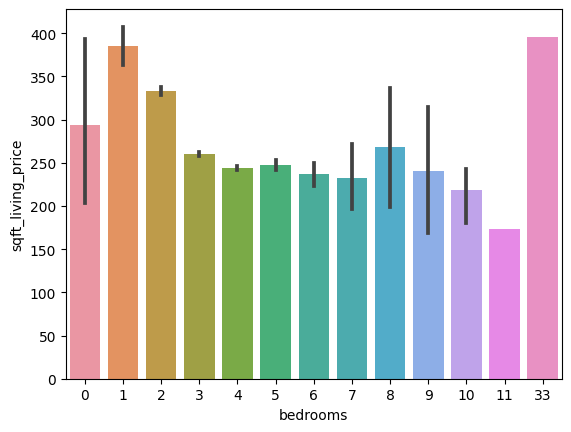

In [20]:
g = sns.barplot(data=df_kc_house, x="bedrooms", y="sqft_living_price")


In [21]:
df_kc_house.groupby("bedrooms")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0,13.0,4.095038e+05,358682.627507,139950.0,235000.00,288000.0,355000.0,1295650.0
1,199.0,3.176429e+05,148864.955017,75000.0,222000.00,299000.0,390000.0,1247000.0
2,2760.0,4.013727e+05,198051.827269,78000.0,269837.50,374000.0,490000.0,3278000.0
3,9824.0,4.662321e+05,262469.771863,82000.0,295487.50,413000.0,560000.0,3800000.0
4,6882.0,6.354195e+05,388594.441911,100000.0,376962.50,549997.5,765000.0,4489000.0
5,1601.0,7.865998e+05,596204.003693,133000.0,438000.00,620000.0,913888.0,7062500.0
6,272.0,8.255206e+05,799238.819958,175000.0,435000.00,650000.0,896250.0,7700000.0
7,38.0,9.511847e+05,739953.558961,280000.0,539250.00,728580.0,946500.0,3200000.0
8,13.0,1.105077e+06,897495.725295,340000.0,490000.00,700000.0,1650000.0,3300000.0


<Axes: xlabel='bedrooms', ylabel='price'>

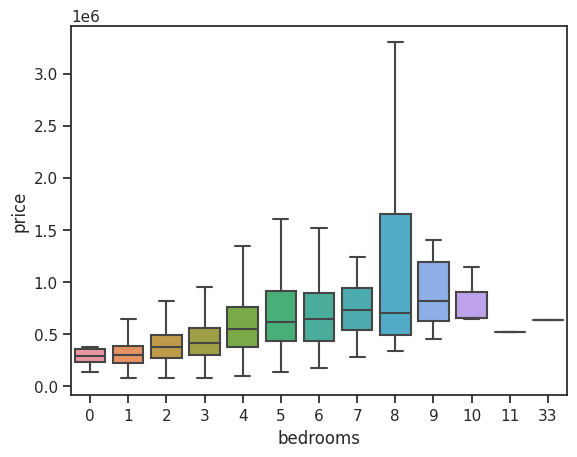

In [22]:
sns.set_theme(style="ticks")

sns.boxplot(x="bedrooms", y="price",
            data=df_kc_house, showfliers=False)

Text(0.5, 1.0, 'Prix moyen par rapport au nombre de chambre')

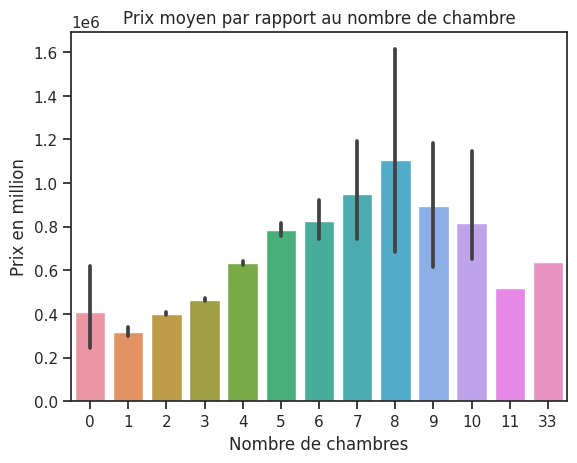

In [23]:
g = sns.barplot(data=df_kc_house, x="bedrooms", y="price")
g.set_xlabel("Nombre de chambres")
g.set_ylabel("Prix en million")
g.set_title("Prix moyen par rapport au nombre de chambre")


In [24]:
##################################################################################################################################################
##################################################################################################################################################

In [25]:
############### PRIX PAR RAPPORT AUX SALLES DE BAIN ##################

In [26]:
df_kc_house["bathrooms"].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [27]:
df_kc_house.groupby("bathrooms")["price"].describe()
# e+05 = 10 puissance 5(5 chiffres après la virgule) donc pour la moyenne de 1 salle de bain le resultat de 3.470412e+05 est 347041 dollars

,count,mean,std,min,25%,50%,75%,max
bathrooms,,,,,,,,
0.00,10.0,4.481600e+05,4.153902e+05,75000.0,165250.0,317500.0,458000.0,1295650.0
0.50,4.0,2.373750e+05,8.888886e+04,109000.0,218500.0,264000.0,282875.0,312500.0
0.75,72.0,2.945209e+05,1.380845e+05,80000.0,201500.0,273500.0,355000.0,785000.0
1.00,3852.0,3.470412e+05,1.545595e+05,78000.0,230000.0,320000.0,425000.0,1300000.0
1.25,9.0,6.212167e+05,4.078361e+05,275000.0,360000.0,516500.0,545000.0,1388000.0
1.50,1446.0,4.093222e+05,1.937847e+05,107000.0,265962.5,370000.0,495600.0,1500000.0
1.75,3048.0,4.548961e+05,2.019625e+05,115000.0,310000.0,422900.0,555000.0,3278000.0
2.00,1930.0,4.578897e+05,2.060055e+05,115000.0,300500.0,423250.0,563000.0,2200000.0
2.25,2047.0,5.336768e+05,2.808988e+05,160000.0,339975.0,472500.0,625000.0,2400000.0


Text(0.5, 1.0, "Prix d'une maison en fonction du nombre de salles de bain")

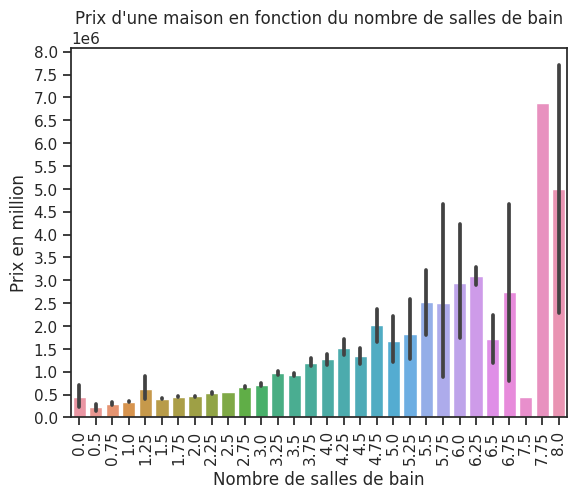

In [28]:
g = sns.barplot(data=df_kc_house,x="bathrooms", y="price")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_yticks(range(0, 8000001, 500000))
g.set_xlabel("Nombre de salles de bain")
g.set_ylabel("Prix en million")
g.set_title("Prix d'une maison en fonction du nombre de salles de bain")

[Text(0, 0, '0.0'),
 Text(1, 0, '0.5'),
 Text(2, 0, '0.75'),
 Text(3, 0, '1.0'),
 Text(4, 0, '1.25'),
 Text(5, 0, '1.5'),
 Text(6, 0, '1.75'),
 Text(7, 0, '2.0'),
 Text(8, 0, '2.25'),
 Text(9, 0, '2.5'),
 Text(10, 0, '2.75'),
 Text(11, 0, '3.0'),
 Text(12, 0, '3.25'),
 Text(13, 0, '3.5'),
 Text(14, 0, '3.75'),
 Text(15, 0, '4.0'),
 Text(16, 0, '4.25'),
 Text(17, 0, '4.5'),
 Text(18, 0, '4.75'),
 Text(19, 0, '5.0'),
 Text(20, 0, '5.25'),
 Text(21, 0, '5.5'),
 Text(22, 0, '5.75'),
 Text(23, 0, '6.0'),
 Text(24, 0, '6.25'),
 Text(25, 0, '6.5'),
 Text(26, 0, '6.75'),
 Text(27, 0, '7.5'),
 Text(28, 0, '7.75'),
 Text(29, 0, '8.0')]

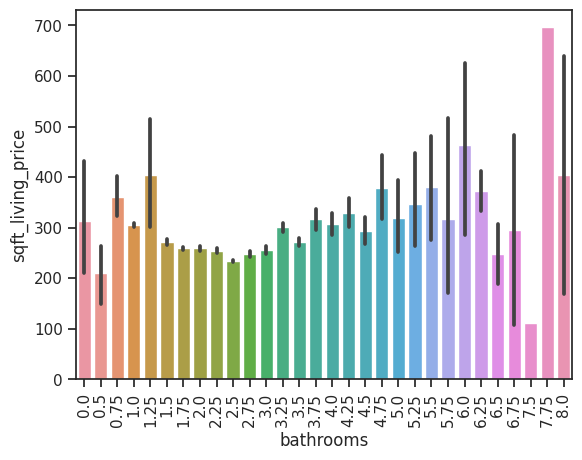

In [29]:
g = sns.barplot(data=df_kc_house,x="bathrooms", y="sqft_living_price")
g.set_xticklabels(g.get_xticklabels(), rotation=90)



In [30]:
###################################################################################################################################################
###################################################################################################################################################

In [31]:
######## PRIX DU PIED CARRE PAR RAPPORT AU ZIPCODE ##########

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98039'),
 Text(25, 0, '98040'),
 Text(26, 0, '98042'),
 Text(27, 0, '98045'),
 Text(28, 0, '98052'),
 Text(29, 0, '98053'),
 Text(30, 0, '98055'),
 Text(31, 0, '98056'),
 Text(32, 0, '98058'),
 Text(33, 0, '98059'),
 Text(34, 0, '98065'),
 Text(35, 0, '98070'),
 Text(36, 0, '98072'),
 Text(37, 0, '98074'),
 Text(38, 0, '98075'),
 Text(39, 0, '98077'),
 Text(40, 0, '98092'),
 Text(41, 0, '98102'),
 Text(42, 0, '98103'),
 Text(43, 0, '98105')

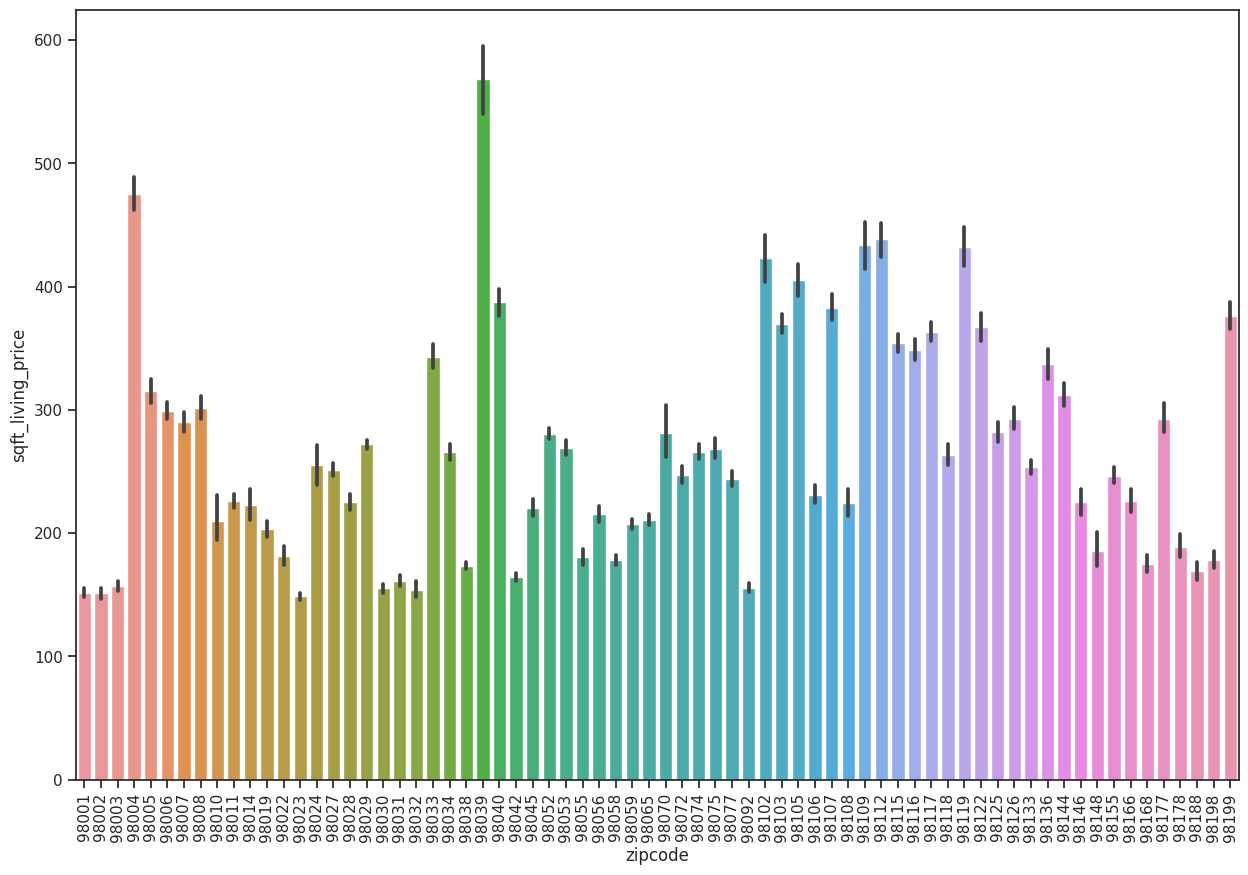

In [32]:
plt.figure(figsize=(15, 10))
g = sns.barplot(data=df_kc_house,x="zipcode", y="sqft_living_price")
g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [33]:
df_kc_house["sqft_living_price"].describe()

count    21613.000000
mean       264.156594
std        110.060793
min         87.588235
25%        182.291667
50%        244.644550
75%        318.322981
max        810.138889
Name: sqft_living_price, dtype: float64

In [34]:
df_kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_price'],
      dtype='object')

In [35]:
import folium

m = folium.Map(location=[47.6062, -122.3321], zoom_start=10)

for i in range(len(df_kc_house)):
    lat = df_kc_house.loc[i, "lat"]
    long = df_kc_house.loc[i, "long"]
    sqft_price = df_kc_house.loc[i, "sqft_living_price"]
    zipcode = df_kc_house.loc[i, "zipcode"]
    yr_built = df_kc_house.loc[i, "yr_built"]
    price = df_kc_house.loc[i, "price"]
    
    popup_text = f"Prix: ${price:,}, Prix au pied carre: ${sqft_price:,}, Zipcode: {zipcode:,}, Année de construction: {yr_built:,}"
    
    if sqft_price < 200:
        color = "blue"
    elif sqft_price >= 200 and sqft_price < 400:
        color = "green"
    elif sqft_price >= 400 and sqft_price < 600:
        color = "orange"
    else:
        color = "red"
    
    marker = folium.CircleMarker(location=[lat, long],
                                 color=color,
                                 radius=2,
                                 fill=True)
    popup = folium.Popup(popup_text, max_width=300)
    
    marker.add_child(popup)
    marker.add_to(m)

m.save("m.html")



In [36]:
###########################################################
### prix au pied carre par rapport a l'état de la maison ##
##########################################################

In [37]:
df_kc_house["condition"].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [38]:
df_kc_house.groupby("condition")["sqft_living_price"].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,30.0,290.361552,176.642360,95.378151,149.434206,246.794872,393.328877,785.340314
2,172.0,244.625079,128.449108,88.785047,156.227355,210.572055,304.669530,792.682927
3,14031.0,257.398188,105.472014,87.588235,179.759023,239.269406,305.027194,810.138889
4,5679.0,270.877775,116.737995,88.083700,181.555311,250.000000,329.361380,792.105263
5,1701.0,298.977801,112.639397,88.000000,212.295082,284.662577,363.924051,758.354756


In [39]:
df_kc_house.groupby("condition")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,30.0,334431.666667,271172.804837,78000.0,160000.0,262500.0,431125.0,1500000.0
2,172.0,327287.145349,245418.413220,80000.0,189750.0,279000.0,397300.0,2555000.0
3,14031.0,542012.578148,364449.062343,75000.0,329500.0,450000.0,640000.0,7062500.0
4,5679.0,521200.390033,358516.231350,89000.0,305000.0,440000.0,625000.0,7700000.0
5,1701.0,612418.089359,410971.922540,110000.0,350000.0,526000.0,725000.0,3650000.0


Text(0.5, 1.0, "Prix moyen par rapport à l'état de la maison")

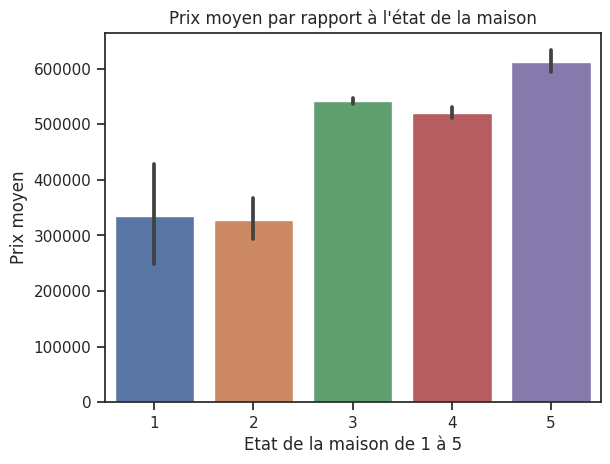

In [40]:
g = sns.barplot(data=df_kc_house, x="condition", y="price")
g.set_xlabel("Etat de la maison de 1 à 5")
g.set_ylabel("Prix moyen")
g.set_title("Prix moyen par rapport à l'état de la maison")

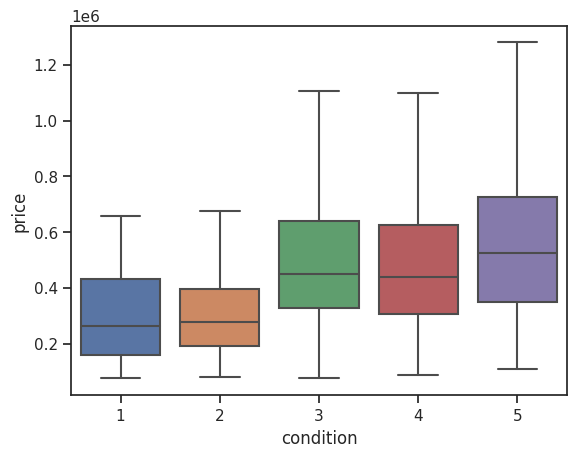

In [41]:
g = sns.boxplot(data=df_kc_house, x="condition", y="price", showfliers=False)


In [42]:
###########################################################
###### PRIX PAR RAPPORT SQFT LOT (pied carre du terrain) #####
###############################################################

In [43]:
df_kc_house.groupby("sqft_lot")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
sqft_lot,,,,,,,,
520,1.0,700000.0,NaN,700000.0,700000.0,700000.0,700000.0,700000.0
572,1.0,250000.0,NaN,250000.0,250000.0,250000.0,250000.0,250000.0
600,1.0,367500.0,NaN,367500.0,367500.0,367500.0,367500.0,367500.0
609,1.0,1234570.0,NaN,1234570.0,1234570.0,1234570.0,1234570.0,1234570.0
635,1.0,256950.0,NaN,256950.0,256950.0,256950.0,256950.0,256950.0
...,...,...,...,...,...,...,...,...
982998,1.0,998000.0,NaN,998000.0,998000.0,998000.0,998000.0,998000.0
1024068,1.0,855000.0,NaN,855000.0,855000.0,855000.0,855000.0,855000.0
1074218,1.0,542500.0,NaN,542500.0,542500.0,542500.0,542500.0,542500.0


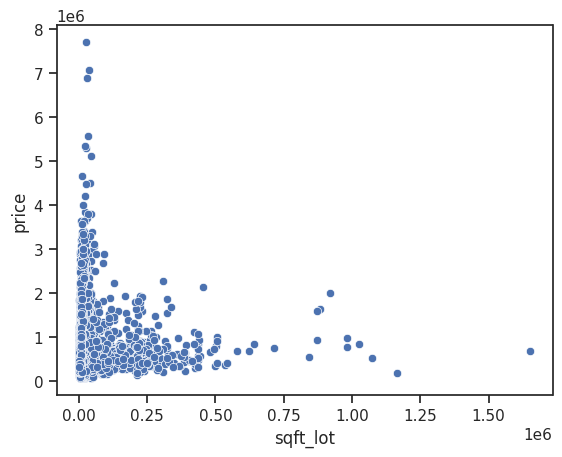

In [44]:
g = sns.scatterplot(data=df_kc_house, x="sqft_lot", y="price")

In [45]:
################################################
######### PRIX PAR RAPPORT AU GRADE ############
############################################### 

In [46]:
df_kc_house.groupby("grade")["sqft_living_price"].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
1,1.0,489.655172,NaN,489.655172,489.655172,489.655172,489.655172,489.655172
3,3.0,360.817706,216.334352,111.940299,289.303483,466.666667,485.256410,503.846154
4,29.0,362.381152,200.053009,98.958333,191.780822,302.083333,536.956522,792.682927
5,242.0,278.933609,156.094405,89.285714,169.729313,225.304878,337.500000,787.037037
6,2038.0,270.991691,121.383453,87.647059,183.172698,241.049304,333.645833,792.105263
7,8981.0,251.902028,106.537604,87.588235,171.779141,228.395062,308.181818,810.138889
8,6068.0,258.086806,97.961332,88.028169,182.323307,247.089707,312.845724,785.340314
9,2615.0,275.767174,105.266274,87.713311,204.272144,254.746835,323.118411,766.283525
10,1134.0,307.589375,122.106320,96.722622,227.882931,272.260274,358.455882,776.892430


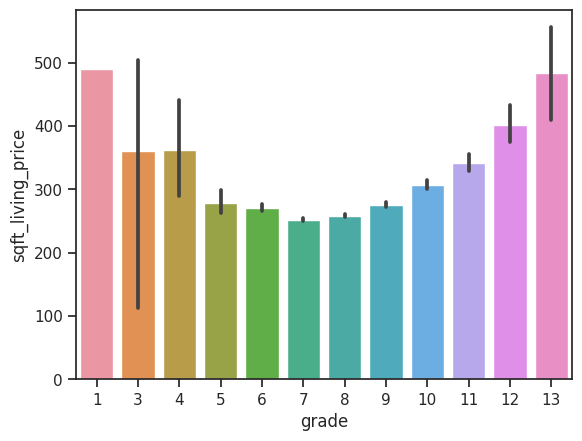

In [47]:
g = sns.barplot(data=df_kc_house, x="grade", y="sqft_living_price")

In [48]:
df_kc_house.groupby("grade")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
1,1.0,1.420000e+05,NaN,142000.0,142000.0,142000.0,142000.0,142000.0
3,3.0,2.056667e+05,1.135180e+05,75000.0,168500.0,262000.0,271000.0,280000.0
4,29.0,2.143810e+05,9.430617e+04,80000.0,145000.0,205000.0,265000.0,435000.0
5,242.0,2.485240e+05,1.181003e+05,78000.0,175000.0,228700.0,295750.0,795000.0
6,2038.0,3.019196e+05,1.229703e+05,82000.0,215037.5,275276.5,366837.5,1200000.0
7,8981.0,4.025903e+05,1.558769e+05,90000.0,285000.0,375000.0,485000.0,2050000.0
8,6068.0,5.428528e+05,2.174734e+05,140000.0,390000.0,510000.0,640000.0,3070000.0
9,2615.0,7.735132e+05,3.161201e+05,230000.0,571500.0,720000.0,880000.0,2700000.0
10,1134.0,1.071771e+06,4.835451e+05,316000.0,768087.5,914327.0,1250000.0,3600000.0


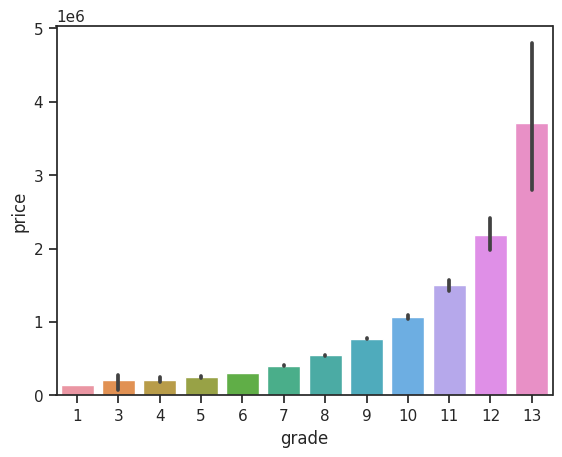

In [49]:
g = sns.barplot(data=df_kc_house, x="grade", y="price")

In [50]:
########################################################
##### PRIX PAR RAPPORT A WATERFRONT (vue sur l'eau)#####
########################################################

In [51]:
df_kc_house["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Text(0.5, 1.0, 'Répartition des maisons waterfront')

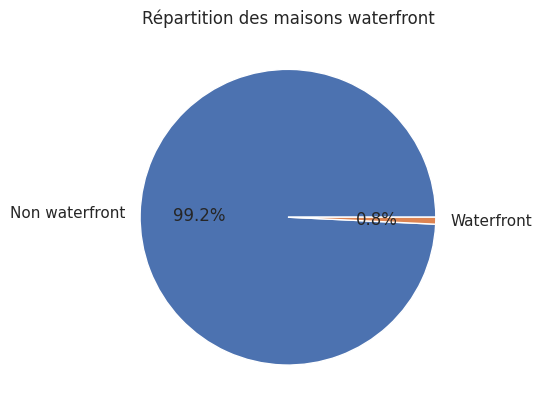

In [52]:
waterfront_counts = df_kc_house["waterfront"].value_counts()

plt.pie(waterfront_counts, labels=["Non waterfront", "Waterfront"], autopct='%1.1f%%')
plt.title("Répartition des maisons waterfront")

In [53]:
df_kc_house.groupby("waterfront")["sqft_living_price"].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,21450.0,262.302879,107.433790,87.588235,181.818182,243.902439,316.728243,810.138889
1,163.0,508.096412,165.854836,117.728532,365.752473,519.083969,645.975141,800.000000


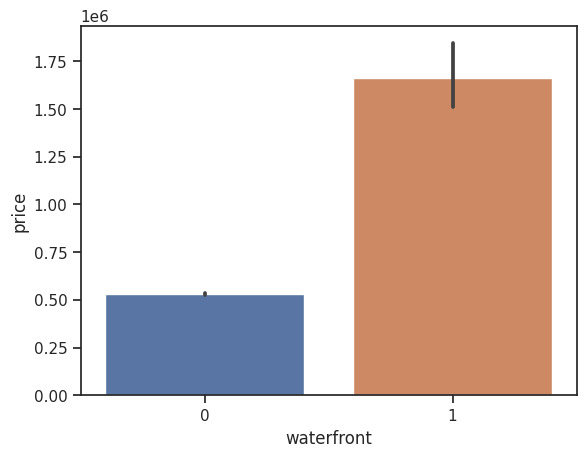

In [135]:
g = sns.barplot(data=df_kc_house, x="waterfront", y="price")

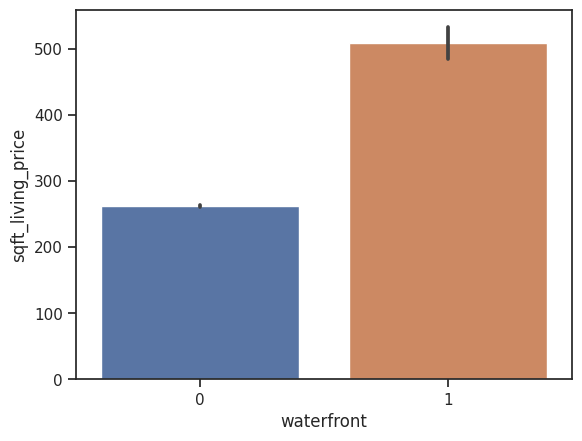

In [54]:
g = sns.barplot(data=df_kc_house, x="waterfront", y="sqft_living_price")

In [55]:
############################################################
######### PRIX PAR RAPPORT A L'ANNEE DE RENOVATION #########
############################################################

In [56]:
df_kc_house["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [57]:
df_kc_house["renovated"] = df_kc_house["yr_renovated"].apply(lambda x: "renovated" if x > 0 else "not renovated")


Text(0.5, 1.0, 'Impact de la rénovation sur le prix de vente')

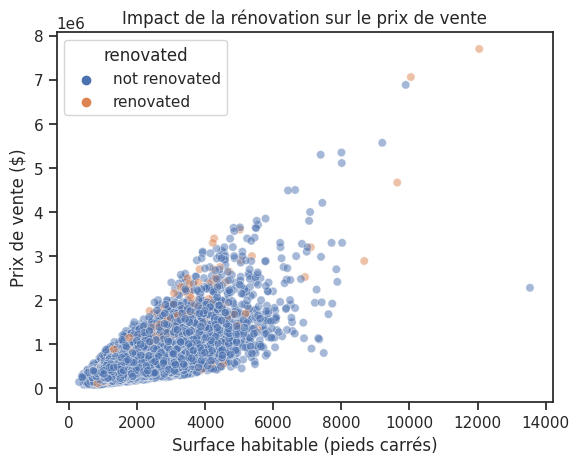

In [58]:
sns.scatterplot(data=df_kc_house, x="sqft_living", y="price", hue="renovated", alpha=0.5)

plt.xlabel("Surface habitable (pieds carrés)")
plt.ylabel("Prix de vente ($)")
plt.title("Impact de la rénovation sur le prix de vente")

In [59]:
###########################################################
#### PRIX PAR RAPPORT A L'ANNEE DE CONSTRUCTION ###########
###########################################################

In [60]:
df_kc_house["yr_built"].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

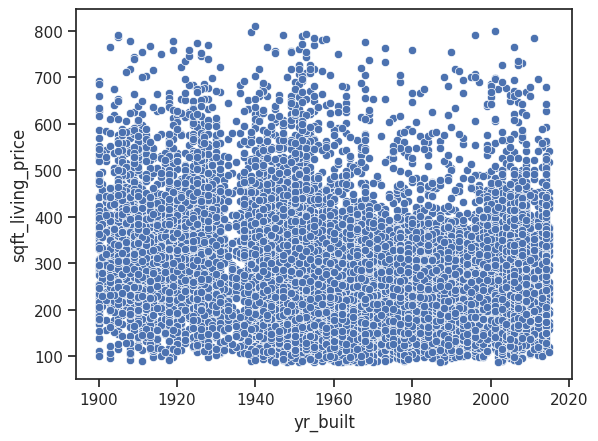

In [61]:
g = sns.scatterplot(data=df_kc_house, x="yr_built", y="sqft_living_price")

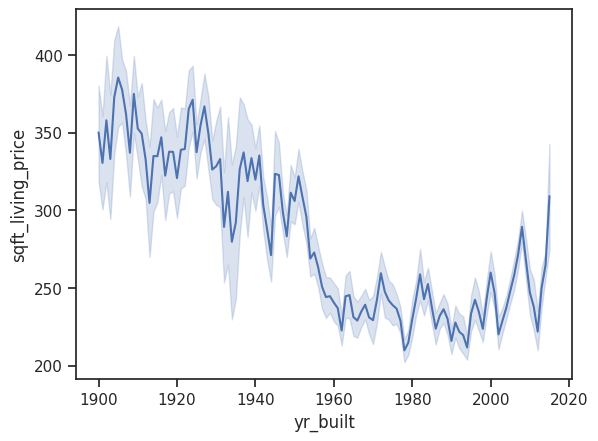

In [62]:
g = sns.lineplot(data=df_kc_house, x="yr_built", y="sqft_living_price")

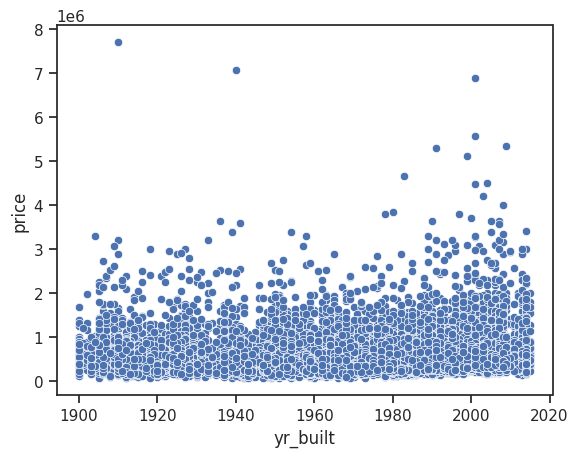

In [63]:
g = sns.scatterplot(data=df_kc_house, x="yr_built", y="price")

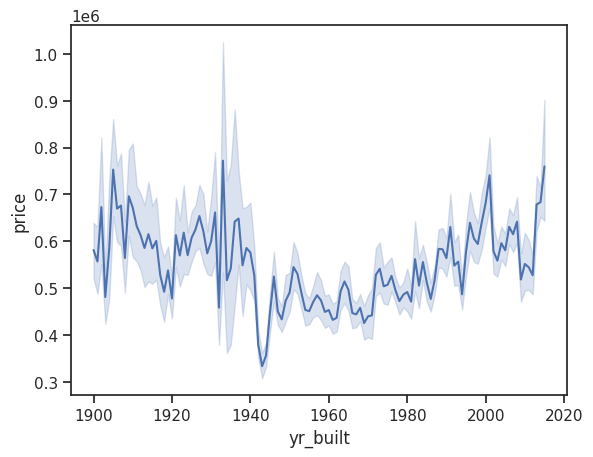

In [64]:
g = sns.lineplot(data=df_kc_house, x="yr_built", y="price")

In [65]:
##########################################################
############ PRIX PAR RAPPORT A LA VUE ###################
##########################################################

In [66]:
df_kc_house["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

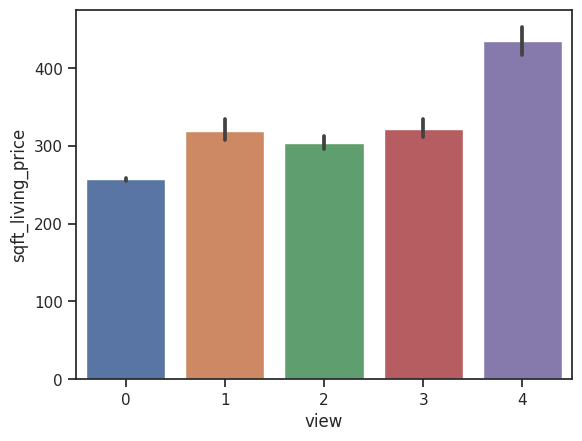

In [67]:
g = sns.barplot(data=df_kc_house, x="view", y="sqft_living_price")

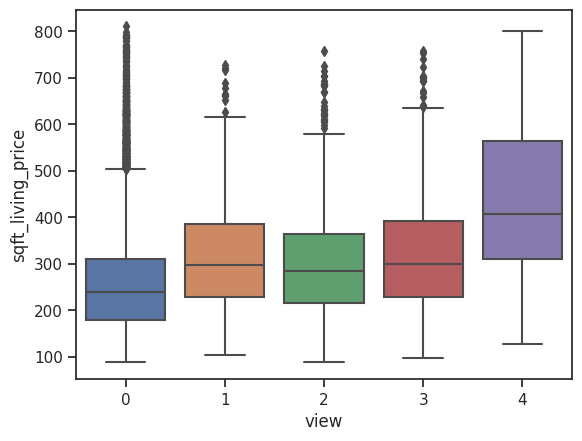

In [68]:
g = sns.boxplot(data=df_kc_house, x="view", y="sqft_living_price")

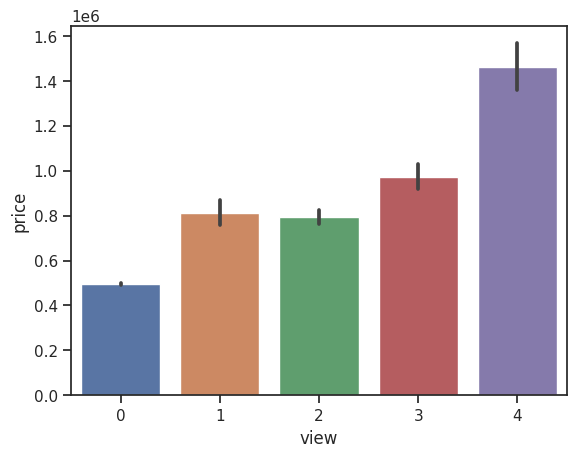

In [69]:
g = sns.barplot(data=df_kc_house, x="view", y="price")

In [208]:
df_kc_house["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

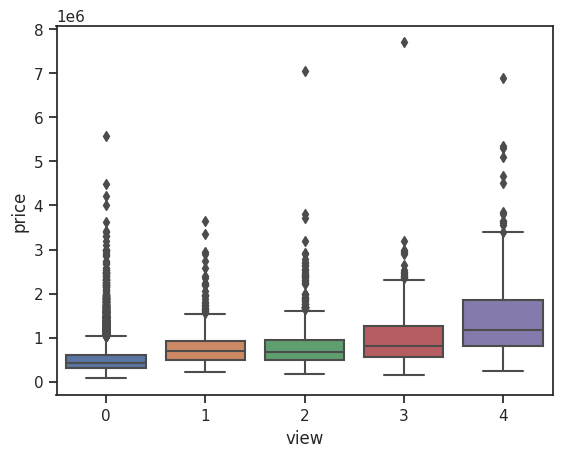

In [70]:
g = sns.boxplot(data=df_kc_house, x="view", y="price")

In [71]:
##########################################################
################## DONNEES PROPRES #######################
##########################################################

In [205]:
df_kc_house_propre = df_kc_house.drop(["id", "date","sqft_lot","floors","view","renovated","sqft_living_price", "sqft_above", "sqft_basement",  "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"], axis=1)

# inplace indique que la modification doit être appliquée directement sur df_kc_house_propre plutôt que de créer une copie modifiée du DataFrame.
# df_kc_house_propre["renovated"].replace(["not renovated","renovated"], [0, 1], inplace=True)

# df_kc_house_propre = df_kc_house_propre[df_kc_house_propre['price'] <= 1500000]

df_kc_house_propre

,price,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1180,0,3,7,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,770,0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,0,3,8,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,0,3,8,98103,47.6993,-122.346
21609,400000.0,4,2.50,2310,0,3,8,98146,47.5107,-122.362
21610,402101.0,2,0.75,1020,0,3,7,98144,47.5944,-122.299
21611,400000.0,3,2.50,1600,0,3,8,98027,47.5345,-122.069


In [73]:
###################################################
############ MODELISATION #########################
##################################################

In [180]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Initialisation de l'estimateur 

y = df_kc_house_propre["price"]
X = df_kc_house_propre.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Choisir et importer le modèle

model = KNeighborsRegressor(n_neighbors=5)

print(model, type(model))

KNeighborsRegressor() <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [181]:
# On entraine le modèle 

trained_model = model.fit(X_train,y_train)

print(trained_model, type(trained_model))

KNeighborsRegressor() <class 'sklearn.neighbors._regression.KNeighborsRegressor'>


In [182]:
# On évalue le modèle 

trained_model.score(X_test,y_test)

0.539880049947373

In [178]:
# On fait la prédiction

predict = trained_model.predict(X_test.head(5))
real = y.head(5).values

print(f"la valeur prédite est {predict}, alors que la valeur réelle est {real}")

la valeur prédite est [1664900. 1664900. 1664900. 1664900. 1664900.], alors que la valeur réelle est [221900. 538000. 180000. 604000. 510000.]


/home/apprenant/miniconda3/envs/env_projet_final/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


/home/apprenant/miniconda3/envs/env_projet_final/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


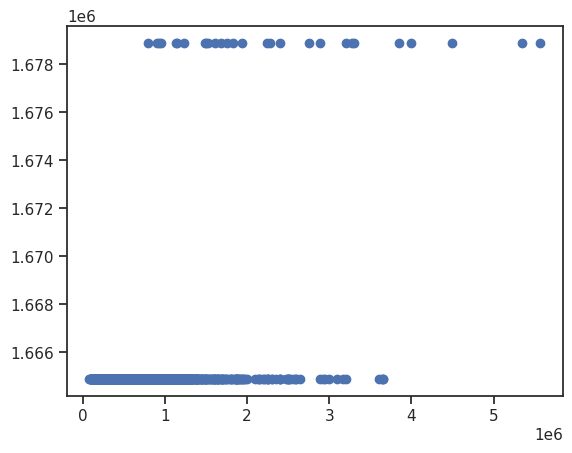

In [171]:
plt.scatter(y_test, trained_model.predict(X_test))


In [206]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Initialisation de l'estimateur 

y = df_kc_house_propre["price"]
X = df_kc_house_propre.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

from sklearn.preprocessing import MinMaxScaler # pour axe x et axe y , avoir une valeur de 0 a 1     x - min / min - max 

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train) # calculez la valeur de min et max

from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
trained_model = model.fit(X_train_min_max,y_train)

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test)# pas fit, pour pas qu'il y a 2 fit différents, on recalcule pas la valeur de min et max

# scoring
trained_model.score(X_test_min_max,y_test)


0.8178190562974669

In [191]:
df_kc_house_propre.head(3)

,price,bedrooms,bathrooms,sqft_living,waterfront,condition,grade,zipcode,lat,long,renovated
0,221900.0,3,1.00,1180,0,3,7,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,0,3,7,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,0,3,6,98028,47.7379,-122.233,0


# PIPELINE

In [207]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Initialisation de l'estimateur 

y = df_kc_house_propre["price"]
X = df_kc_house_propre.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

numeric_features = ["sqft_living","bedrooms","bathrooms","lat","long"]


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('stdscaler', MinMaxScaler()),
        ])


# On cree un pre-processeur pour les variables catégorielles
categorial_features = [ "zipcode","waterfront","condition","grade"]

from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(sparse=True)

# a l'aide de la classe ColumnTransformer, 
# on déclare à quelles variables on applique quel transformer
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorial_features)
    ]
)


from sklearn.neighbors import KNeighborsRegressor
knn_4 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
     ('prep', preprocessor),
     ('knn', knn_4)
])

# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

/home/apprenant/miniconda3/envs/env_projet_final/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8208650996071847